In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [262]:
pd.set_option('display.max_columns',None)

In [263]:
df = pd.read_csv('../data/insurance.csv')

In [264]:
df.head(5) #display head (top 5 rows)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [265]:
df.tail(5) #display tail (last 5 rows)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [266]:
print(f"Shape: ",df.shape) #get total shape of dataset, total rows and columns
print("Number of Columns:", df.shape[1])
print("Number of Rows:", df.shape[0])

Shape:  (1338, 7)
Number of Columns: 7
Number of Rows: 1338


In [267]:
df.info() #quick info about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [268]:
df.describe().transpose() #statistics for numerical datatypes

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [269]:
df.isna().sum() #number of missing values per column

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [270]:
df.dropna() #drop rows with any NA values

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [271]:
print("Number of Duplicates: ", df.duplicated().sum())

Number of Duplicates:  1


In [272]:
df.drop_duplicates() #drop rows with duplicate values

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [273]:
df.nunique() #number of unique values in each column

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [274]:
df.columns #show all cloumns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [275]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('Numerical Features : {} : {}'.format(len(numerical_features), numerical_features))
print('Categorical Features : {} : {}'.format(len(categorical_features), categorical_features))

Numerical Features : 4 : ['age', 'bmi', 'children', 'charges']
Categorical Features : 3 : ['sex', 'smoker', 'region']


In [276]:
#get unique values in categorical columns
for column in categorical_features:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'sex': ['female' 'male']
Unique values in column 'smoker': ['yes' 'no']
Unique values in column 'region': ['southwest' 'southeast' 'northwest' 'northeast']


In [277]:
# converting sex and smoker from categorical to numerical
#df['sex'] = df['sex'].map({'male': 0, 'female': 1})
#df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

In [278]:
#df.info()

Visualisation

In [279]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

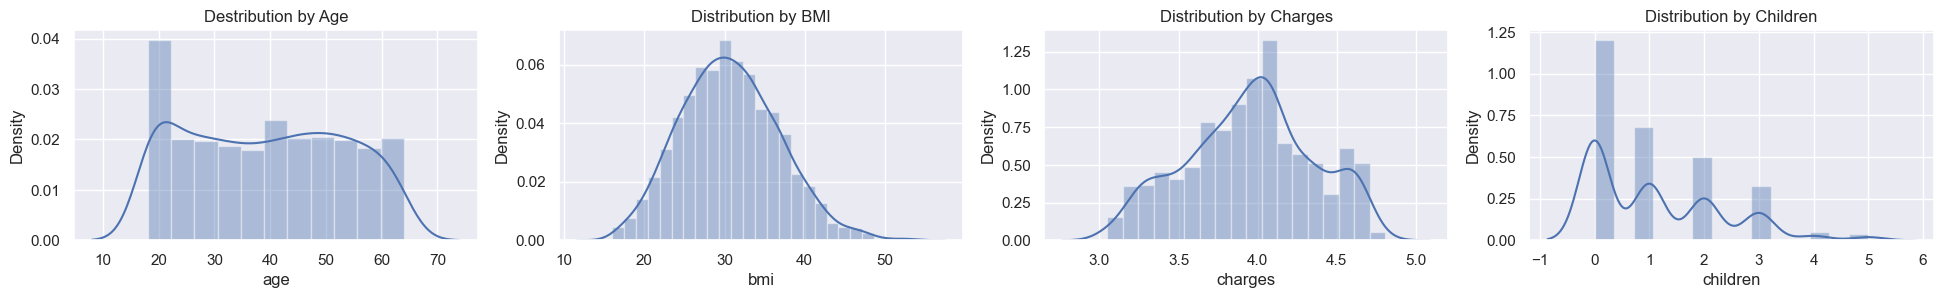

In [280]:
#Visualization of the dataset distribution
plt.figure(figsize=(24,6))
plt.subplot(2,4,1)
sns.set()
sns.distplot(df['age'])
plt.title('Destribution by Age')
plt.subplot(2,4,2)
sns.distplot(df['bmi'])
plt.title('Distribution by BMI')
plt.subplot(2,4,3)
sns.distplot(np.log10(df['charges'])) #applying log function as the data is left skewed
plt.title('Distribution by Charges')
plt.subplot(2,4,4)
sns.distplot(df['children'])
plt.title('Distribution by Children')
plt.show()

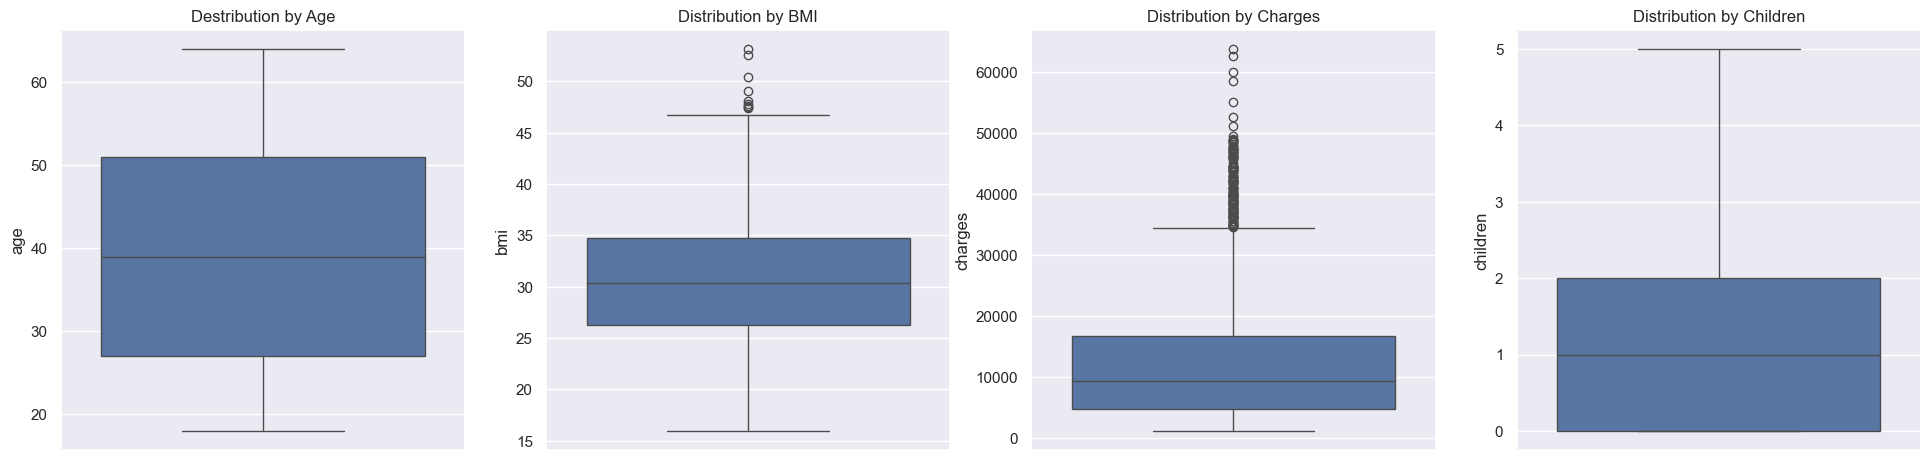

In [281]:
#Visualization of the dataset distribution
plt.figure(figsize=(24,12))
plt.subplot(2,4,1)
sns.set()
sns.boxplot(df['age'])
plt.title('Destribution by Age')
plt.subplot(2,4,2)
sns.boxplot(df['bmi'])
plt.title('Distribution by BMI')
plt.subplot(2,4,3)
sns.boxplot(df['charges']) #without log function there are outliers identified
#sns.boxplot(np.log10(df['charges'])) #applying log function as the data is left skewed
plt.title('Distribution by Charges')
plt.subplot(2,4,4)
sns.boxplot(df['children'])
plt.title('Distribution by Children')
plt.show()

<Axes: xlabel='smoker', ylabel='charges'>

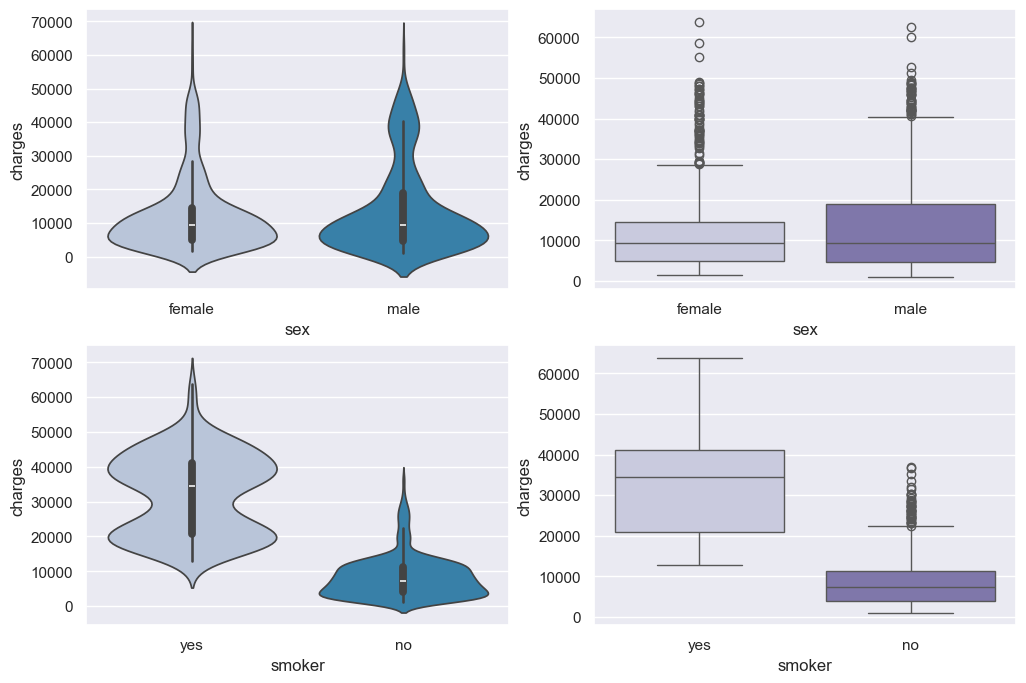

In [282]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.violinplot(x='sex', y='charges',data=df,palette='PuBu')
plt.subplot(2,2,2)
sns.boxplot(x='sex', y='charges',data=df,palette='Purples')
plt.subplot(2,2,3)
sns.violinplot(x='smoker', y='charges',data=df,palette='PuBu')
plt.subplot(2,2,4)
sns.boxplot(x='smoker', y='charges',data=df,palette='Purples')

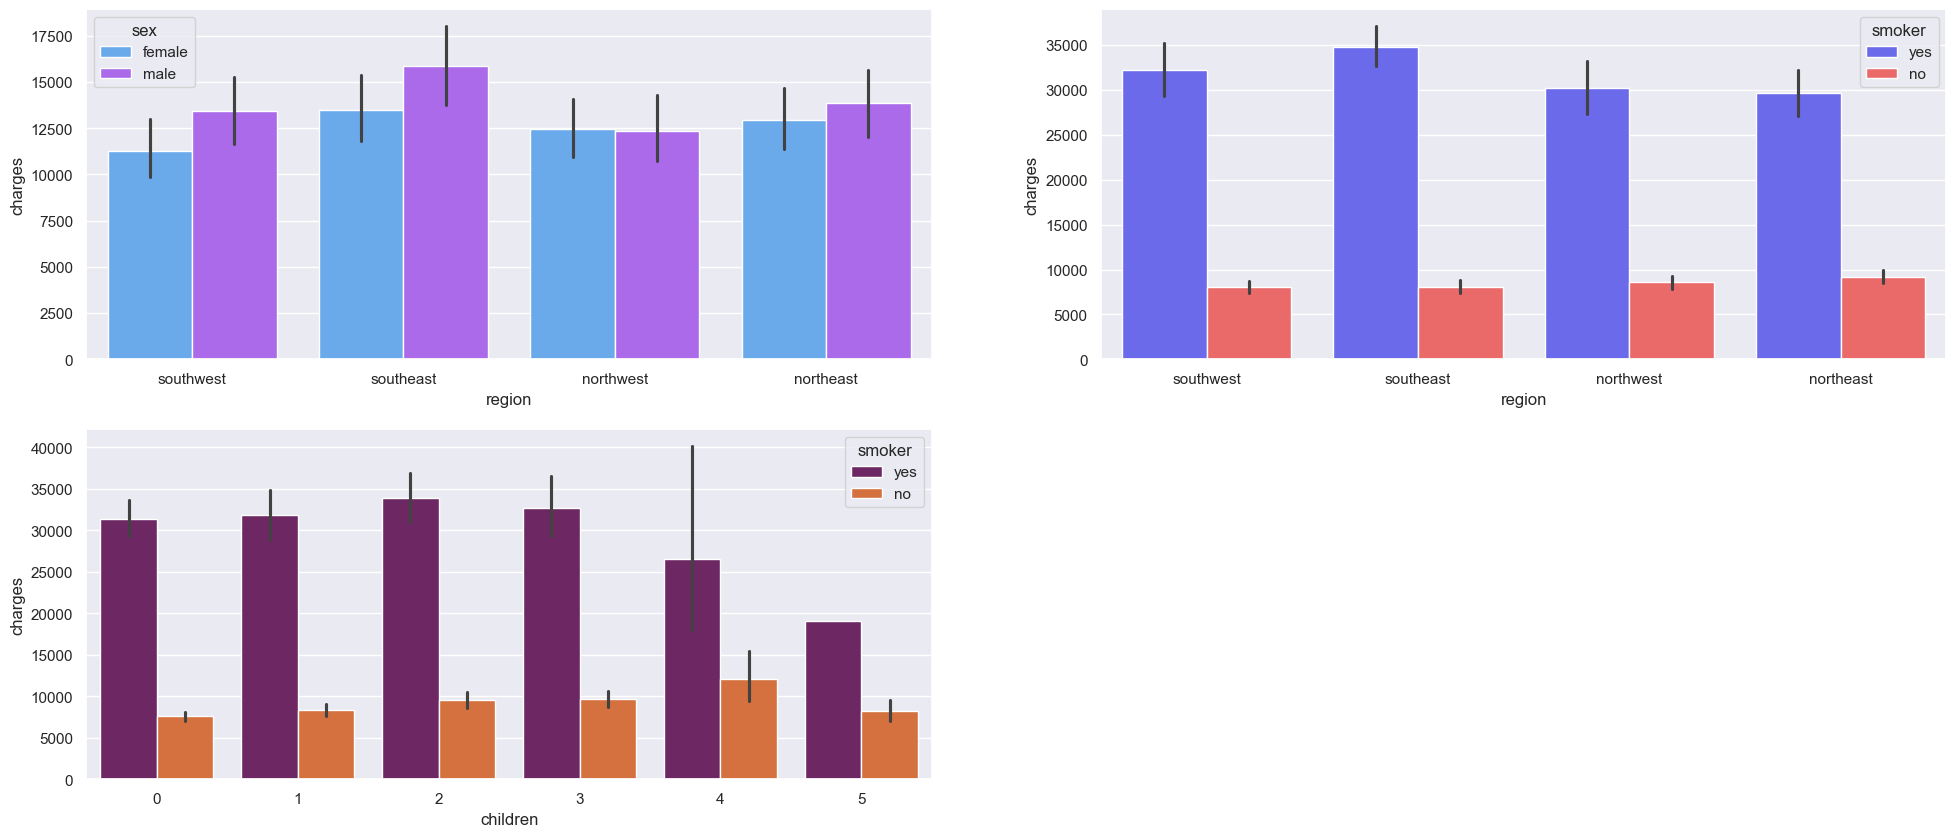

In [283]:
plt.figure(figsize=(24,10))
plt.subplot(2,2,1)
sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')
plt.subplot(2,2,2)
sns.barplot(x = 'region', y = 'charges', hue='smoker', data=df, palette='seismic')
plt.subplot(2,2,3)
sns.barplot(x = 'children', y = 'charges', data=df,orient='v', hue='smoker', palette='inferno')
plt.show()

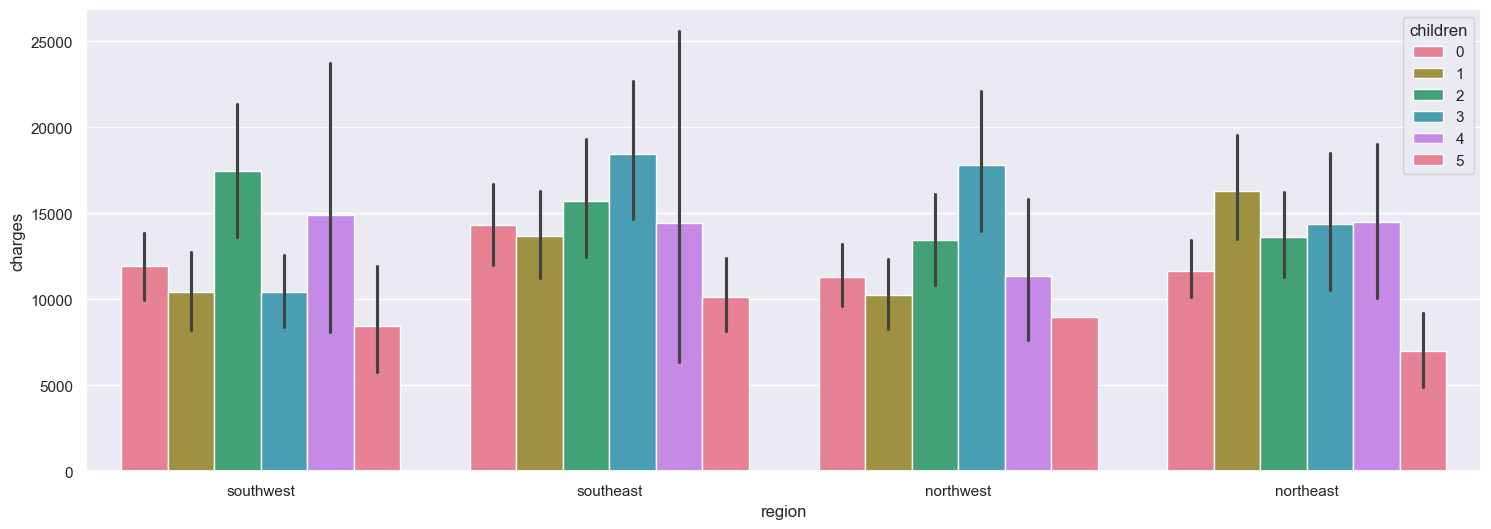

In [284]:
f, ax = plt.subplots(1, 1, figsize=(18, 6))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='husl')

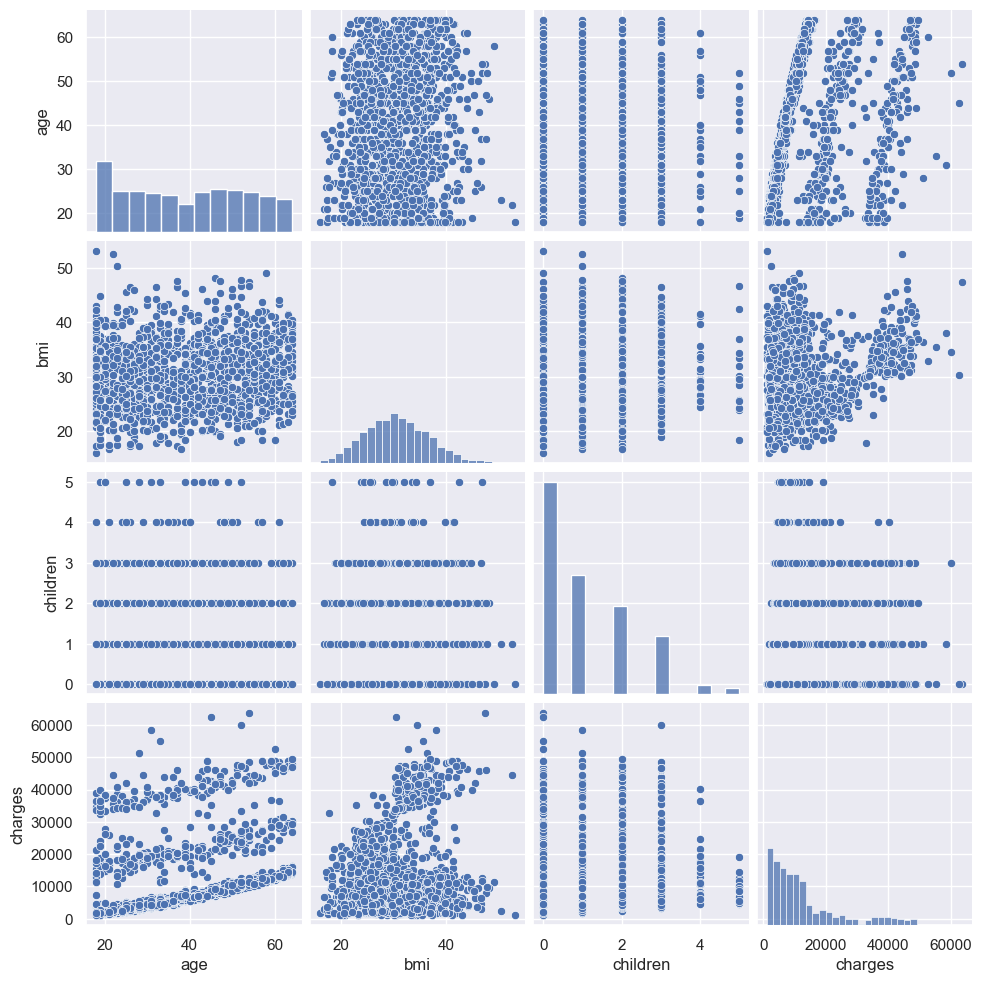

In [285]:
sns.pairplot(df)

<Axes: >

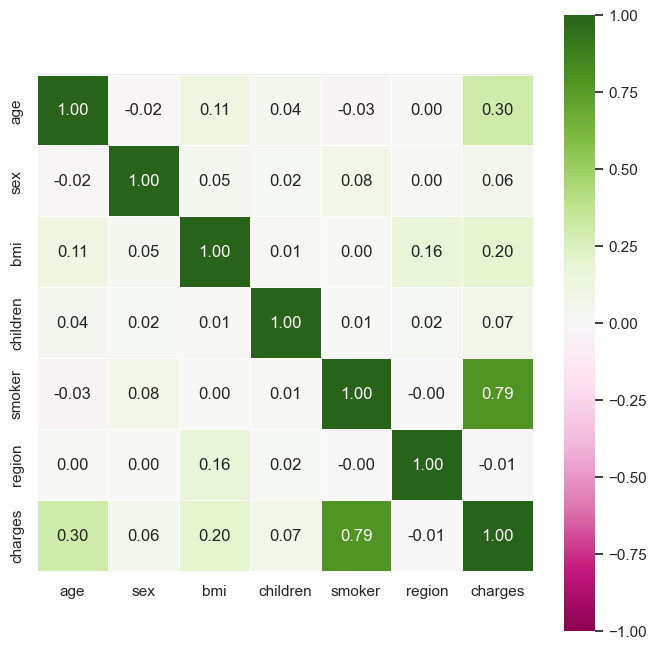

In [286]:
#applying label encoding on columns with less unique values.
df['sex']= label_encoder.fit_transform(df['sex']) 
df['smoker']= label_encoder.fit_transform(df['smoker'])
df['region']= label_encoder.fit_transform(df['region'])
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True, cmap = 'PiYG', vmin = -1, vmax = 1, center = 0, fmt=".2f", square=True, linewidths=.5)

In [287]:
# new calculated column bmi_range
df['bmi_range'] = 'normal'
df.loc[(df['bmi'] < 18.5), 'bmi_range'] = 'underweight'
df.loc[(df['bmi'] > 25.0) & (df['bmi'] < 29.9), 'bmi_range'] = 'overweight'
df.loc[(df['bmi'] > 30.0), 'bmi_range'] = 'obese'
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_range
0,19,0,27.900,0,1,3,16884.92400,overweight
1,18,1,33.770,1,0,2,1725.55230,obese
2,28,1,33.000,3,0,2,4449.46200,obese
3,33,1,22.705,0,0,1,21984.47061,normal
4,32,1,28.880,0,0,1,3866.85520,overweight


In [288]:
# new calculated column age_range
df['age_range'] = 'senior'
df.loc[(df['age'] > 0) & (df['age'] <= 30), 'age_range'] = 'youngster'
df.loc[(df['age'] > 30) & (df['age'] <= 62), 'age_range'] = 'middle-aged'
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_range,age_range
0,19,0,27.900,0,1,3,16884.92400,overweight,youngster
1,18,1,33.770,1,0,2,1725.55230,obese,youngster
2,28,1,33.000,3,0,2,4449.46200,obese,youngster
3,33,1,22.705,0,0,1,21984.47061,normal,middle-aged
4,32,1,28.880,0,0,1,3866.85520,overweight,middle-aged


In [289]:
young_df = df[df['age_range'] == 'youngster']
young_overweight_percent = (young_df[young_df['bmi_range'] == 'overweight']['age_range'].count() / len(young_df)) * 100
young_obese_percent = (young_df[young_df['bmi_range'] == 'obese']['age_range'].count() / len(young_df)) * 100
young_normal_percent = (young_df[young_df['bmi_range'] == 'normal']['age_range'].count() / len(young_df)) * 100
young_underweight_percent = (young_df[young_df['bmi_range'] == 'underweight']['age_range'].count() / len(young_df)) * 100
print("Young & Normal: {}%".format(round(young_normal_percent,2)))
print("Young & Underweight: {}%".format(round(young_underweight_percent,2)))
print("Young & Overweight: {}%".format(round(young_overweight_percent,2)))
print("Young & Obsese: {}%".format(round(young_obese_percent,2)))

Young & Normal: 21.85%
Young & Underweight: 2.48%
Young & Overweight: 26.8%
Young & Obsese: 48.87%
